In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append('..')

import pickle
import json

# Script params

In [3]:
max_len = 250
embedding_dim = 32

# Load train and test data

In [4]:
from keras.utils import pad_sequences

2023-08-16 00:05:27.468769: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_train_df.pkl', 'rb') as f:
    train_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_test_df.pkl', 'rb') as f:
    test_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/token2index.json', 'r') as f:
    token2index = json.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/index2token.json', 'r') as f:
    index2token = json.load(f)

In [6]:
max_index = max(list(token2index.values())) + 1

In [7]:
x_train = pad_sequences(train_df.token_indexes.values, maxlen = max_len)
y_train = train_df.labels.values
x_test = pad_sequences(test_df.token_indexes.values, maxlen = max_len)
y_test = test_df.labels.values

In [8]:
x_train.shape, y_train.shape

((25000, 250), (25000,))

In [9]:
x_test.shape, y_test.shape

((25000, 250), (25000,))

# Training simple dnn with embedding layer

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, BatchNormalization
from keras.metrics import AUC, BinaryAccuracy
from keras.optimizers import RMSprop

In [11]:
model = Sequential()
model.add(Embedding(max_index, embedding_dim))
model.add(Conv1D(32, 3, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

2023-08-16 00:05:35.064501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-16 00:05:35.066227: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-16 00:05:35.067383: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [12]:
optimizer = RMSprop(learning_rate=0.0001, momentum = 0.3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[BinaryAccuracy(), AUC()])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          554944    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                        

In [14]:
fit_history = model.fit(x_train,
                        y_train,
                        epochs=15,
                        batch_size=64,
                        validation_data=(x_test, y_test)
                       )

Epoch 1/15


2023-08-16 00:05:35.709844: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-16 00:05:35.711655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-16 00:05:35.712890: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

390/391 [============================>.] - ETA: 0s - loss: 0.6925 - binary_accuracy: 0.5190 - auc: 0.5353

2023-08-16 00:05:57.406776: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-16 00:05:57.408971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-16 00:05:57.410970: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - 27s 65ms/step - loss: 0.6925 - binary_accuracy: 0.5190 - auc: 0.5356 - val_loss: 0.6910 - val_binary_accuracy: 0.5819 - val_auc: 0.6579
Epoch 2/15
391/391 [==============================] - 26s 68ms/step - loss: 0.6700 - binary_accuracy: 0.6563 - auc: 0.7247 - val_loss: 0.5889 - val_binary_accuracy: 0.7586 - val_auc: 0.8809
Epoch 3/15
391/391 [==============================] - 26s 66ms/step - loss: 0.5080 - binary_accuracy: 0.8016 - auc: 0.8675 - val_loss: 0.4474 - val_binary_accuracy: 0.8022 - val_auc: 0.9127
Epoch 4/15
391/391 [==============================] - 26s 67ms/step - loss: 0.3772 - binary_accuracy: 0.8595 - auc: 0.9197 - val_loss: 0.3388 - val_binary_accuracy: 0.8626 - val_auc: 0.9325
Epoch 5/15
391/391 [==============================] - 27s 68ms/step - loss: 0.3067 - binary_accuracy: 0.8872 - auc: 0.9428 - val_loss: 0.3158 - val_binary_accuracy: 0.8690 - val_auc: 0.9393
Epoch 6/15
391/391 [==============================] - 26s 67m

In [15]:
from kst.plots.BasePlots import BasePlots, ScatterPlot
import pandas as pd
from plotnine import aes, geom_point, geom_line, ylim, labs, theme

In [16]:
df = pd.DataFrame.from_dict(fit_history.history)
df['epoch'] = df.index.to_list()
df

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc,epoch
0,0.692543,0.51904,0.535551,0.691015,0.58188,0.657902,0
1,0.670010,0.65628,0.724682,0.588868,0.75864,0.880878,1
2,0.508031,0.80160,0.867488,0.447394,0.80220,0.912709,2
3,0.377179,0.85948,0.919744,0.338837,0.86260,0.932514,3
4,0.306672,0.88720,0.942793,0.315822,0.86896,0.939318,4
5,0.266370,0.90352,0.955548,0.324034,0.86568,0.942300,5
6,0.241983,0.91588,0.962581,0.316369,0.87156,0.942731,6
7,0.216236,0.92584,0.969509,0.320451,0.87228,0.942094,7
8,0.198021,0.93392,0.973836,0.337044,0.86772,0.941679,8
9,0.180963,0.94140,0.977703,0.334768,0.86904,0.941118,9


In [17]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'loss', 'color':"'training'"},
                 main_title='Binary crossentropy',
                 x_label='Epoch',
                 y_label='Loss',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))

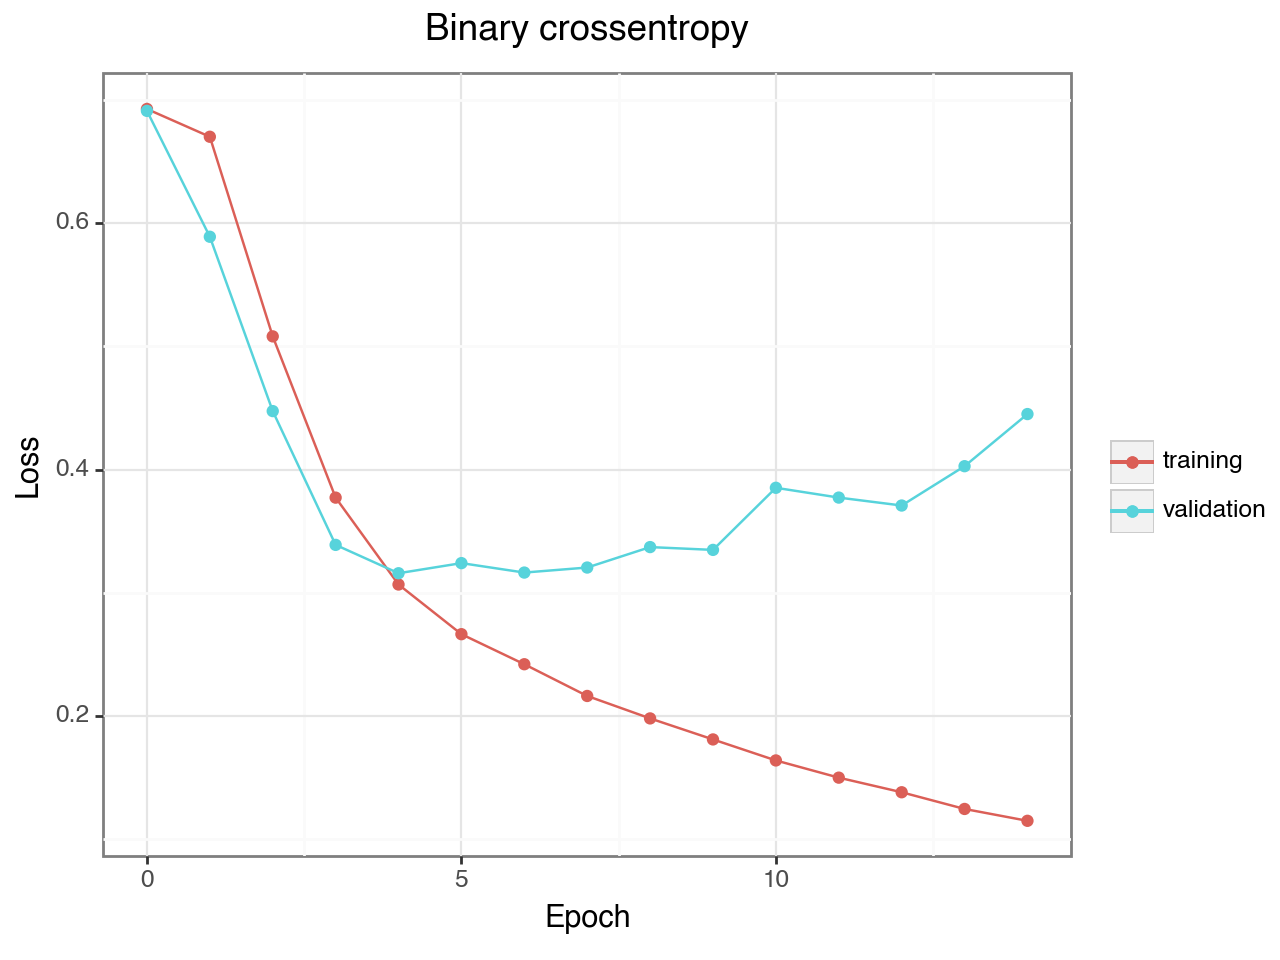

<Figure Size: (640 x 480)>

In [18]:
sc.plot

In [19]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'auc', 'color':"'training'"},
                 main_title='Area under curve',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))

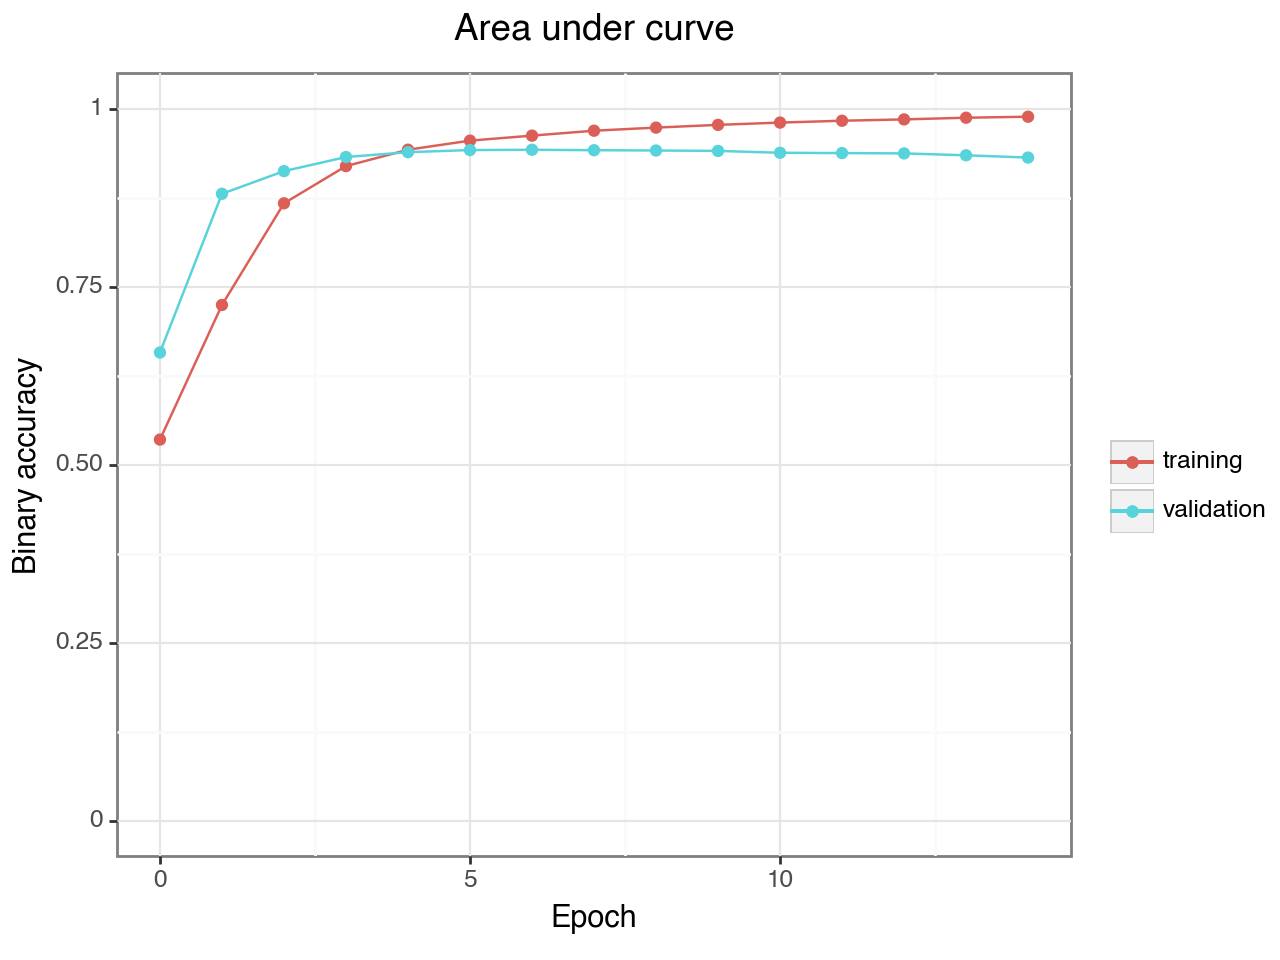

<Figure Size: (640 x 480)>

In [20]:
sc.plot + ylim(0,1)

In [21]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'binary_accuracy', 'color':"'training'"},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))

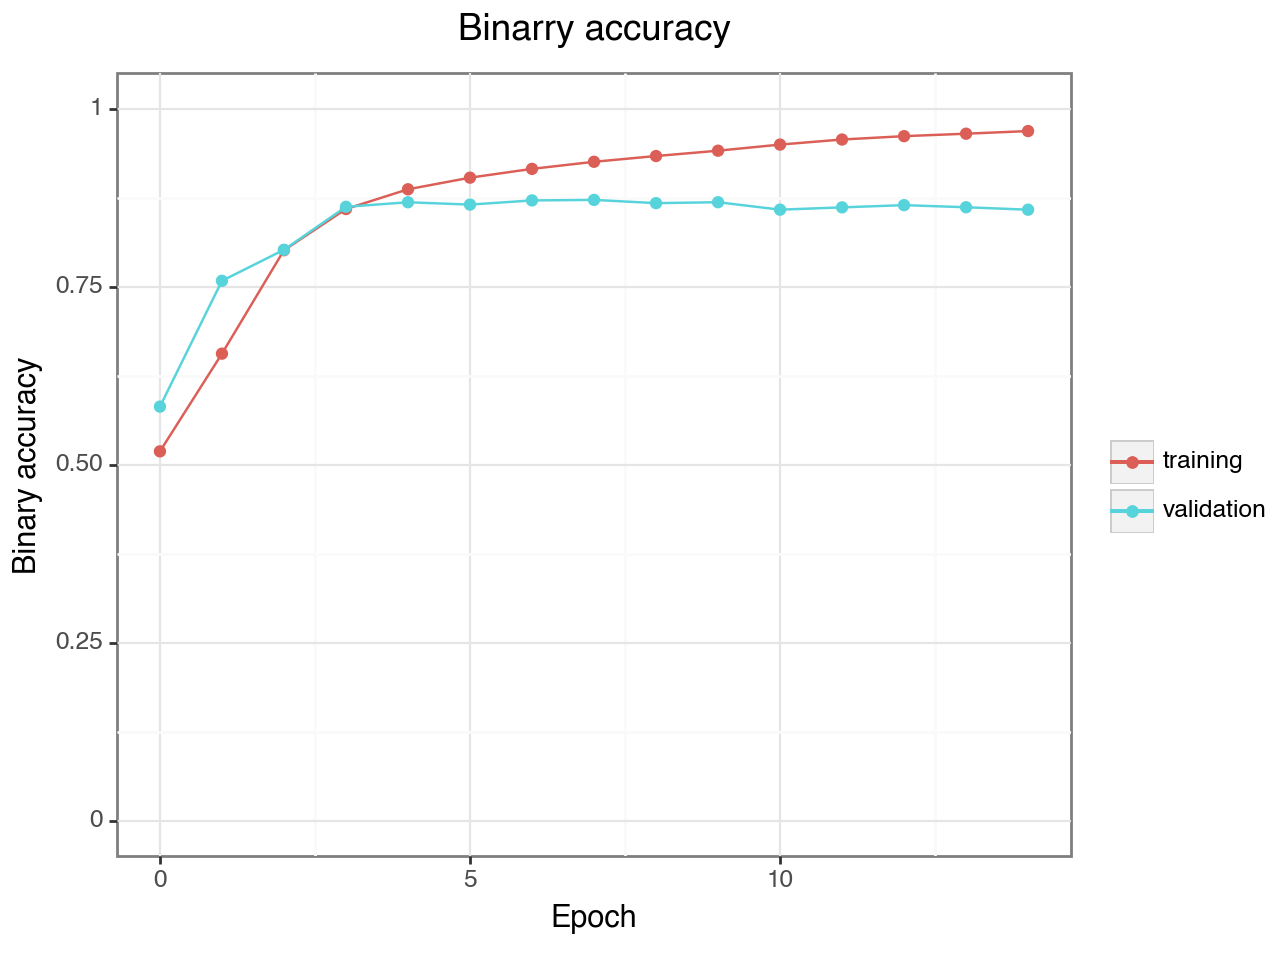

<Figure Size: (640 x 480)>

In [22]:
sc.plot + ylim(0,1)

# Extract embeddings

In [23]:
embedding_vectors = model.layers[0].weights[0]

In [24]:
token2vector = {}
for index, vector in enumerate(embedding_vectors):
    token2vector[index2token.get(str(index))] = vector.numpy()

In [25]:
token2vector_df = pd.DataFrame.from_dict({'token':list(token2vector.keys()), 'em_vector': list(token2vector.values())})

In [26]:
token2vector_df

,token,em_vector
0,aag,"[0.042613905, 0.028905563, 0.05208884, 0.05242..."
1,aaron,"[0.041463237, 0.033363145, -0.0064356346, 0.00..."
2,ab,"[-0.04763383, 0.03750877, 0.03919439, -0.03110..."
3,abandon,"[-0.009670729, -0.04008148, -0.011398479, 0.01..."
4,abandoned,"[-0.015558987, -0.007302483, -0.0021371914, -0..."
...,...,...
17337,zu,"[0.040448233, -0.019261718, 0.039845366, -0.04..."
17338,zucker,"[-0.04223608, -0.0444207, -0.035828847, 0.0238..."
17339,zulu,"[-0.03656056, 0.0061904485, -0.027472861, 0.02..."
17340,zuniga,"[0.03881725, -0.04262405, -0.007237525, -0.035..."


In [27]:
token2vector_tsne = pd.DataFrame.from_dict(token2vector, orient='index')

In [28]:
token2vector_tsne

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
aag,0.042614,0.028906,0.052089,0.052424,-0.021406,0.041907,0.049511,-0.015042,0.005416,-0.040120,...,-0.033083,0.004547,0.030895,0.030459,0.024412,-0.044093,-0.032351,-0.032090,0.002762,-0.030467
aaron,0.041463,0.033363,-0.006436,0.006625,0.038489,-0.027914,-0.037415,-0.041001,-0.027745,-0.010307,...,-0.035427,-0.013492,0.029871,0.043176,0.046599,0.013979,0.010913,-0.037570,-0.038591,0.026494
ab,-0.047634,0.037509,0.039194,-0.031104,0.035102,-0.019886,0.026648,-0.003026,0.012771,-0.039685,...,-0.034566,-0.002947,0.009104,0.034378,0.000727,-0.039571,0.002230,0.037396,-0.012774,0.022850
abandon,-0.009671,-0.040081,-0.011398,0.019084,-0.030333,0.043376,-0.008216,0.020597,0.041719,-0.028345,...,-0.040590,-0.031796,0.029786,0.027039,0.015100,0.019691,0.025908,0.061231,0.029578,0.011291
abandoned,-0.015559,-0.007302,-0.002137,-0.001297,0.014839,0.025089,0.059232,-0.035715,-0.012958,0.002111,...,-0.035197,0.009393,-0.031010,0.031166,-0.034498,0.005677,0.016386,0.031998,0.025884,0.046070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zu,0.040448,-0.019262,0.039845,-0.040361,0.036553,0.049603,0.032627,0.034335,0.044685,0.039616,...,-0.000683,0.040581,0.013214,0.015854,0.030877,0.028281,0.011831,0.037718,-0.036754,-0.006807
zucker,-0.042236,-0.044421,-0.035829,0.023821,-0.012915,0.005274,0.006724,-0.028170,0.046313,-0.004357,...,-0.027392,0.010578,0.046458,-0.047747,0.000572,-0.035641,0.023149,0.018197,-0.038212,0.048098
zulu,-0.036561,0.006190,-0.027473,0.022166,0.046972,0.018383,-0.036283,0.009887,-0.057980,-0.038614,...,-0.019200,-0.056405,0.022881,0.024452,-0.007390,-0.006578,-0.017312,-0.026040,0.021225,-0.016231
zuniga,0.038817,-0.042624,-0.007238,-0.035936,0.039048,0.014238,0.019356,0.009596,-0.041048,0.016966,...,-0.001512,0.043407,-0.003386,-0.005756,-0.005548,0.027697,0.002978,-0.015276,0.051508,-0.024318


In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne_transformer = TSNE(n_components=2, verbose=1, random_state=123)

In [31]:
z = tsne_transformer.fit_transform(token2vector_tsne) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17342 samples in 0.003s...
[t-SNE] Computed neighbors for 17342 samples in 1.262s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17342
[t-SNE] Computed conditional probabilities for sample 2000 / 17342
[t-SNE] Computed conditional probabilities for sample 3000 / 17342
[t-SNE] Computed conditional probabilities for sample 4000 / 17342
[t-SNE] Computed conditional probabilities for sample 5000 / 17342
[t-SNE] Computed conditional probabilities for sample 6000 / 17342
[t-SNE] Computed conditional probabilities for sample 7000 / 17342
[t-SNE] Computed conditional probabilities for sample 8000 / 17342
[t-SNE] Computed conditional probabilities for sample 9000 / 17342
[t-SNE] Computed conditional probabilities for sample 10000 / 17342
[t-SNE] Computed conditional probabilities for sample 11000 / 17342
[t-SNE] Computed conditional probabilities for sample 12000 / 17342
[t-SNE] Computed conditional probabilities for sam

In [32]:
token2vector_tsne['comp-0'] = z[:,0]
token2vector_tsne['comp-1'] = z[:,1]

In [33]:
list_of_animals = [animal.lower() for animal in pd.read_csv("/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/animals.csv").name.to_list()]

In [34]:
tsne_df = token2vector_tsne.sample(n=5000).reset_index()
# tsne_df = token2vector_tsne.reset_index()
tsne_df.rename(columns={'index':'token'}, inplace=True)
tsne_df['labels'] = 'background'
tsne_df.loc[[x in list_of_animals for x in tsne_df.token],['labels']]  = 'animals'

In [35]:
tsne_df

,token,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,comp-0,comp-1,labels
0,ambassador,-0.034284,-0.005829,-0.025400,0.010417,-0.021041,0.040157,-0.014898,-0.009700,0.027816,...,0.009174,0.013284,-0.047441,0.036645,-0.016498,-0.050676,0.037968,-37.517708,-1.223197,background
1,bearable,0.047782,0.013814,-0.049110,-0.015554,0.010706,0.005355,0.029452,0.056916,-0.025697,...,-0.027176,-0.021577,-0.014409,-0.050165,-0.028923,-0.046733,-0.036170,40.670921,14.343546,background
2,joe,0.000805,-0.021895,0.044369,0.022542,0.039848,0.022842,-0.013339,-0.009867,-0.043161,...,-0.015364,-0.018442,0.003518,0.035190,-0.005815,0.032970,0.016293,20.621941,-41.399677,background
3,orchestra,-0.021264,-0.022618,-0.029481,0.042683,-0.017660,0.032663,0.021704,-0.007327,0.032204,...,-0.041216,0.029238,-0.023528,0.020491,-0.020108,0.043499,0.021159,-25.849972,8.860607,background
4,conformity,-0.036670,-0.018088,0.005091,-0.036734,-0.050644,0.006404,-0.000975,-0.000568,0.001059,...,-0.033071,0.014650,0.025881,0.020377,0.006389,-0.027713,-0.004785,-31.743296,10.614428,background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,unwarranted,-0.007413,0.029414,-0.002483,0.037110,0.055627,0.043112,0.020792,0.005299,-0.051501,...,-0.017892,0.003572,-0.039001,0.038110,0.008827,-0.023939,-0.016927,35.506981,-3.415377,background
4996,subscribe,-0.048738,0.001911,0.023579,-0.029766,0.005765,-0.027243,0.043795,-0.040352,0.026720,...,0.001161,-0.054924,0.052175,-0.039895,-0.025989,0.019695,0.013010,-49.905762,7.761867,background
4997,blood,0.034586,-0.042190,0.003671,-0.007294,0.046704,0.043688,0.048753,-0.025779,-0.036423,...,-0.015799,0.014648,-0.029752,0.040785,0.021654,-0.008787,-0.035219,33.907116,13.529236,background
4998,asserts,-0.042424,-0.032513,0.028053,-0.039097,0.043786,0.047875,0.003982,0.029634,-0.039000,...,0.042740,0.033333,-0.036042,-0.012521,0.012292,-0.014622,0.010838,57.703407,20.192953,background


In [36]:
sc = ScatterPlot(data_set=tsne_df,
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'labels'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

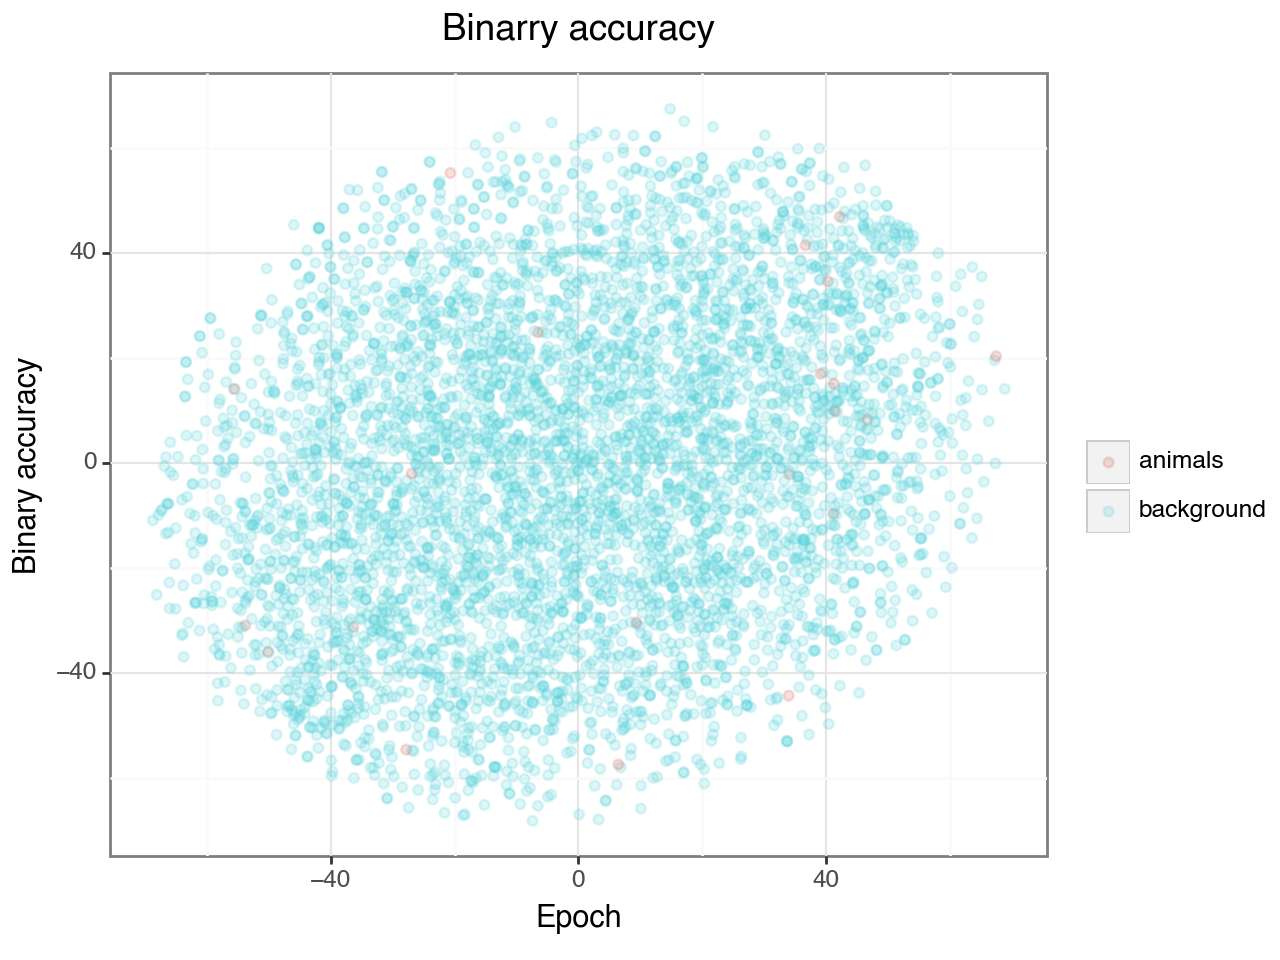

<Figure Size: (640 x 480)>

In [37]:
sc.plot

In [38]:
sc = ScatterPlot(data_set=tsne_df[tsne_df.labels == 'animals'],
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'token'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

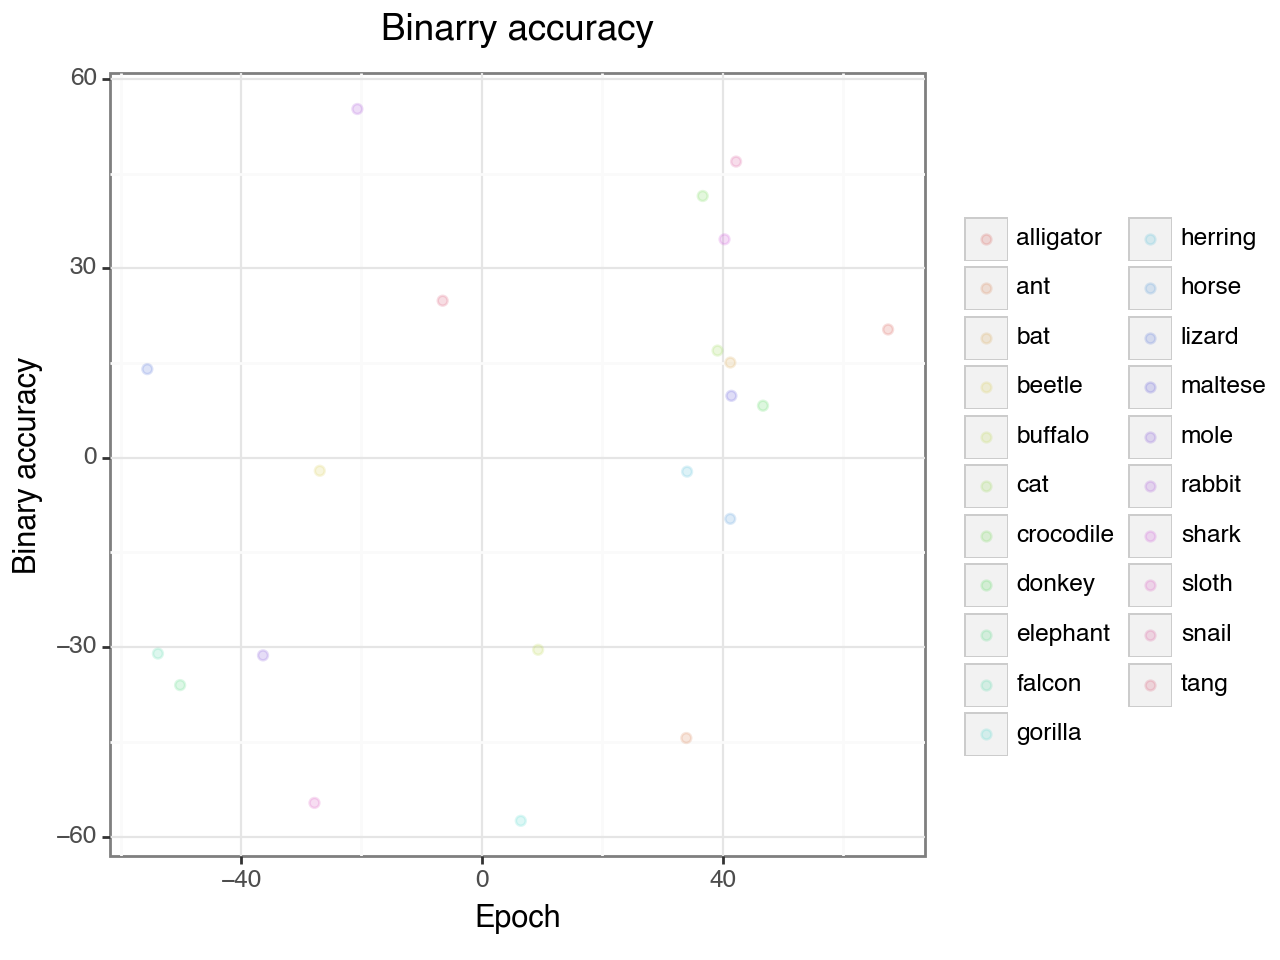

<Figure Size: (640 x 480)>

In [39]:
sc.plot

In [40]:
tsne_df[tsne_df.labels == 'animals'].sort_values(by = ['comp-0', 'comp-1'])

,token,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,comp-0,comp-1,labels
3766,lizard,0.008876,0.028649,0.021438,-0.025616,0.041204,0.006995,0.035630,-0.041243,0.000213,...,0.033959,-0.046178,-0.005311,0.034327,0.019646,0.005449,0.026291,-55.591953,14.036946,animals
73,falcon,-0.048385,0.036218,-0.032811,0.013105,-0.042609,-0.000675,-0.014092,-0.037071,-0.010900,...,-0.018606,0.029609,-0.037176,0.045404,0.048913,-0.033549,0.020086,-53.829742,-31.001337,animals
1294,elephant,-0.050351,-0.008359,0.005360,-0.002159,0.029826,-0.033576,0.010340,-0.048879,-0.010825,...,0.043214,0.027620,0.004545,0.053341,0.008720,-0.022683,0.038277,-50.142639,-35.999302,animals
115,mole,-0.004573,0.014249,0.027889,-0.042315,-0.014749,-0.015446,-0.007876,-0.003908,0.050048,...,0.000836,0.034369,0.025292,0.028500,-0.003233,0.051894,0.025488,-36.365677,-31.288002,animals
1615,sloth,-0.047574,-0.044066,0.053460,0.008172,0.009720,-0.014044,-0.016814,-0.043937,0.025231,...,0.057147,-0.034361,-0.011109,-0.024317,0.038513,0.018232,-0.008537,-27.814581,-54.651272,animals
2797,beetle,-0.036209,-0.016262,0.030091,0.046470,0.030470,-0.022149,-0.005530,0.025046,0.045534,...,0.045326,-0.022827,0.055765,-0.019199,0.005194,-0.008752,0.020456,-26.932138,-2.063450,animals
3477,rabbit,-0.030810,-0.029495,-0.029407,-0.013150,-0.036459,0.001736,0.038585,-0.047450,0.040355,...,-0.027744,0.030871,0.005882,0.054753,0.030369,-0.017603,-0.012286,-20.684505,55.221588,animals
3248,tang,-0.009798,0.019804,0.037784,-0.047426,-0.024907,0.013041,-0.028234,0.009601,-0.019584,...,0.041262,-0.015098,0.036855,0.017221,0.018173,-0.007883,0.010813,-6.510835,24.866417,animals
2214,gorilla,0.016180,0.017376,-0.045604,0.043434,0.024136,0.001521,-0.020013,0.046685,-0.005895,...,0.017022,0.029406,0.017522,0.031605,0.019413,0.020550,0.045314,6.474968,-57.485722,animals
2473,buffalo,-0.002465,0.028894,-0.028154,0.045046,0.008331,-0.033496,0.004507,0.023676,-0.028792,...,0.048926,0.002064,0.002119,-0.034127,0.000371,-0.029801,0.025653,9.352445,-30.403730,animals
